In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tt
from sklearn.linear_model import LogisticRegression as lr
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [210]:
df = pd.read_csv(r"C:\Users\91936\Desktop\wine and healthcare\healthcare\healthcare_dataset.csv")
print(df.shape)
df.drop_duplicates(inplace = True)
print(df.shape)

(10000, 15)
(10000, 15)


In [211]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [212]:
df.drop(['Name','Date of Admission','Room Number','Discharge Date','Insurance Provider'],axis = 1,inplace = True)

In [213]:
for j in df.columns:
    print(j)
    print(df[j].nunique())
    print(df[j].unique())
    print()

Age
68
[81 35 61 49 51 41 82 55 33 39 45 23 85 72 65 32 64 66 80 79 54 26 70 74
 56 37 78 83 30 19 46 48 34 84 47 60 57 21 27 68 31 42 71 38 28 43 69 73
 67 44 20 59 76 40 36 29 53 77 24 75 25 62 52 50 22 63 58 18]

Gender
2
['Female' 'Male']

Blood Type
8
['O-' 'O+' 'B-' 'AB+' 'A+' 'AB-' 'A-' 'B+']

Medical Condition
6
['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']

Doctor
9416
['Patrick Parker' 'Diane Jackson' 'Paul Baker' ... 'Robert Nicholson'
 'Jamie Lewis' 'Tasha Avila']

Hospital
8639
['Wallace-Hamilton' 'Burke, Griffin and Cooper' 'Walton LLC' ...
 'Nash-Krueger' 'Wilson-Lyons' 'Torres, Young and Stewart']

Billing Amount
10000
[37490.98336353 47304.06484548 36874.89699661 ... 49559.20290467
 25236.34476098 37223.96586473]

Admission Type
3
['Elective' 'Emergency' 'Urgent']

Medication
5
['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' 'Ibuprofen']

Test Results
3
['Inconclusive' 'Normal' 'Abnormal']



As there are too many Hospitals and Doctors there can't be any pattern with them 

In [214]:
df.drop(['Doctor','Hospital'],axis =1,inplace = True)

In [215]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results
0,81,Female,O-,Diabetes,37490.983364,Elective,Aspirin,Inconclusive
1,35,Male,O+,Asthma,47304.064845,Emergency,Lipitor,Normal
2,61,Male,B-,Obesity,36874.896997,Emergency,Lipitor,Normal
3,49,Male,B-,Asthma,23303.322092,Urgent,Penicillin,Abnormal
4,51,Male,O-,Arthritis,18086.344184,Urgent,Paracetamol,Normal


In [216]:
df['GB'] = df['Gender'].astype(str) + df['Blood Type'].astype(str) 
df['GB'].unique()

array(['FemaleO-', 'MaleO+', 'MaleB-', 'MaleO-', 'MaleAB+', 'MaleA+',
       'FemaleA+', 'FemaleAB+', 'FemaleO+', 'MaleAB-', 'FemaleB-',
       'MaleA-', 'FemaleA-', 'FemaleAB-', 'FemaleB+', 'MaleB+'],
      dtype=object)

In [217]:
map_g = {'Female':0,'Male':1}
map_b = {'O-':0, 'O+':1, 'B-':2, 'AB+':3, 'A+':4, 'AB-':5, 'A-':6, 'B+':7}
map_mc = {'Diabetes':0, 'Asthma':1, 'Obesity':2, 'Arthritis':3, 'Hypertension':4, 'Cancer':5}
map_at = {'Elective':0,'Emergency':1, 'Urgent':2}
map_med = {'Aspirin':0, 'Lipitor':1, 'Penicillin':2, 'Paracetamol':3, 'Ibuprofen':4}
map_tr = {'Inconclusive':0,'Normal':1,'Abnormal':2}
map_gb = {'FemaleO-':0, 'MaleO+':1, 'MaleB-':2, 'MaleO-':3, 'MaleAB+':4, 'MaleA+':5,
       'FemaleA+':6, 'FemaleAB+':7, 'FemaleO+':8, 'MaleAB-':9, 'FemaleB-':10,
       'MaleA-':11, 'FemaleA-':12, 'FemaleAB-':13, 'FemaleB+':14, 'MaleB+':15}

df['Gender'] = df['Gender'].map(map_g)
df['Blood Type'] = df['Blood Type'].map(map_b)
df['Medical Condition'] = df['Medical Condition'].map(map_mc)
df['Admission Type'] = df['Admission Type'].map(map_at)
df['Medication'] = df['Medication'].map(map_med)
df['Test Results'] = df['Test Results'].map(map_tr)
df['GB'] = df['GB'].map(map_gb)

In [218]:
df

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results,GB
0,81,0,0,0,37490.983364,0,0,0,0
1,35,1,1,1,47304.064845,1,1,1,1
2,61,1,2,2,36874.896997,1,1,1,2
3,49,1,2,1,23303.322092,2,2,2,2
4,51,1,0,3,18086.344184,2,3,1,3
...,...,...,...,...,...,...,...,...,...
9995,83,1,4,2,39606.840083,0,4,2,5
9996,47,0,3,3,5995.717488,1,4,1,7
9997,54,1,2,3,49559.202905,0,4,1,2
9998,84,1,4,3,25236.344761,2,2,1,5


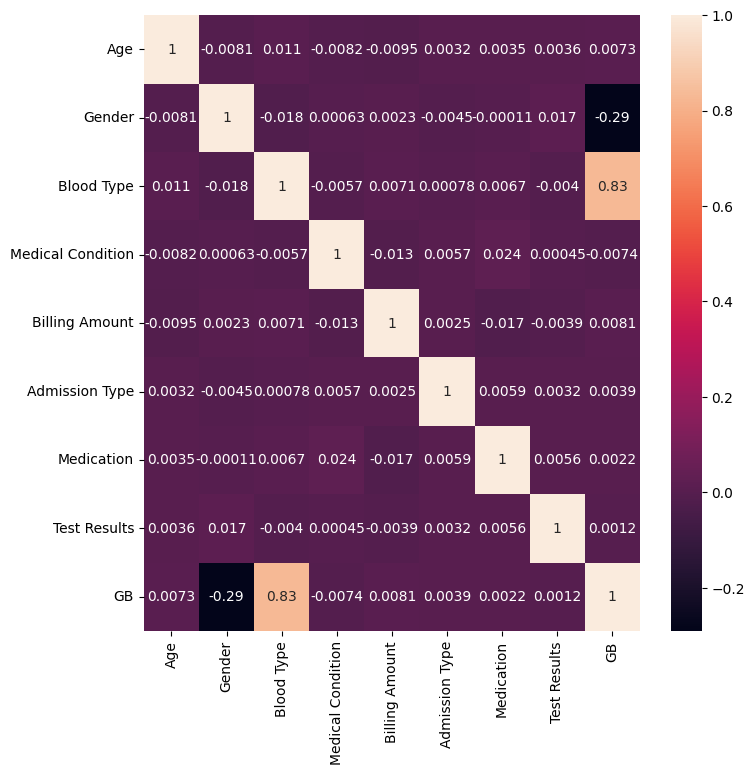

In [219]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [220]:
x = df.drop('Test Results',axis = 1)
y = df['Test Results']

In [221]:
x_train,x_test,y_train,y_test = tt(x,y,random_state = 42)

In [222]:
algo1 = lr()
algo1.fit(x_train,y_train)
y_pred1 = algo1.predict(x_test)
algo1.score(x_test,y_test)

0.3532

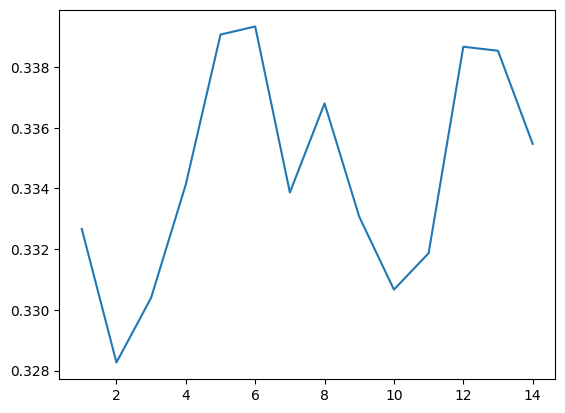

[0.33266666666666667, 0.32826666666666665, 0.3304, 0.33413333333333334, 0.3390666666666667, 0.3393333333333333, 0.33386666666666664, 0.33680000000000004, 0.3330666666666666, 0.3306666666666666, 0.33186666666666664, 0.33866666666666667, 0.3385333333333333, 0.3354666666666667]


In [223]:
x_axis = []
y_axis = []

for i in range(1,15):
    k = knn(n_neighbors = i)
    score = cross_val_score(k,x_train,y_train)
    
    x_axis.append(i)
    y_axis.append(score.mean())
    
plt.plot(x_axis,y_axis)
plt.show()
print(y_axis)

In [224]:
algo1 = lr()
algo1.fit(x_train,y_train)
y_pred1 = algo1.predict(x_test)
score = algo1.score(x_test,y_test)
print(score)

0.3532


In [225]:
algo2 = knn(n_neighbors = 8)
algo2.fit(x_train,y_train)
y_pred2 = algo2.predict(x_test)
score = cross_val_score(algo2,x_test,y_test)
print(score.mean())

0.3204


In [226]:
algo3 = dt()
algo3.fit(x_train,y_train)
y_pred3 = algo3.predict(x_test)
algo3.score(x_test,y_test)

0.3344

In [227]:
algo4 = rf()
algo4.fit(x_train,y_train)
y_pred4 = algo4.predict(x_test)
algo4.score(x_test,y_test)

0.3388

In [208]:
algo5 = SVC()
algo5.fit(x_train,y_train)
algo5.score(x_test,y_test)

0.3364